In [14]:
import illustris_python as il
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dataPath1 = "../data/tng100-1/cutdata/Subhalo_Centrals_minE9_SM_earlyType_Gas.pkl"
df1 = pd.read_pickle(dataPath1)
#df1["SubhaloVel"] = df1.eval(df1["SubhaloVel"])

dataPath2 = "../data/tng100-1/cutdata/Subhalo_Centrals_minE9_SM_lateType_Gas.pkl"
df2 = pd.read_pickle(dataPath2)
#df2["SubhaloVel"] = df2.eval(df2["SubhaloVel"])


Plotting stellar mass as function of velocity dispersion.

<Figure size 432x288 with 0 Axes>

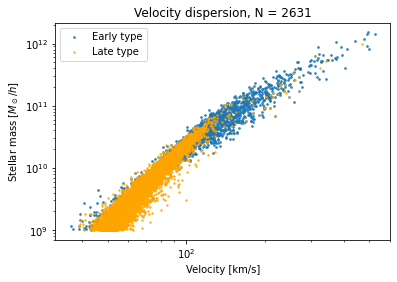

In [15]:
df1["SubhaloMassStellar"] *=10**10
df2["SubhaloMassStellar"] *=10**10

fig, ax = plt.subplots(0)
ax = df1.plot.scatter(x="SubhaloVelDisp", y="SubhaloMassStellar",s=3, label = "Early type", alpha=0.8)
df2.plot.scatter(x="SubhaloVelDisp", y="SubhaloMassStellar",s=2, color = "orange", alpha=0.8 , ax = ax, label = "Late type")
il.formatplot.formatPlotVD_SM(title = "Velocity dispersion", df=df1)
plt.savefig("../fig/FP/early_late_VD_SM_GasFraction.png")

Plotting stellar mass as function of radius.

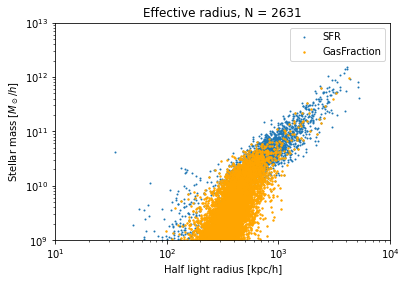

In [16]:
df1["SubhaloHalfmassRad"] *=10
df2["SubhaloHalfmassRad"] *=10

ax1 = df1.plot.scatter(x="SubhaloHalfmassRad", y="SubhaloMassStellar",s=1, label = "SFR")
df2.plot.scatter(x="SubhaloHalfmassRad", y="SubhaloMassStellar",s=2, color = "orange", label = "GasFraction", ax=ax1)
il.formatplot.formatPlotR_SM(title="Effective radius", df = df1)
